In [1]:
# !pip install fastaudio
# !pip install fastai==2.5.2
# !pip install matplotlib==3.2.2
# !pip install scikit-learn==1.0.2

     |████████████████████████████████| 53 kB 459 kB/s            
     |████████████████████████████████| 1.9 MB 979 kB/s            
     |████████████████████████████████| 194 kB 59.1 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 183 kB 52.7 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 804.1 MB 2.2 kB/s             ��███████████████████▉  | 749.1 MB 33.6 MB/s eta 0:00:02
  Created wheel for librosa: filename=librosa-0.8.0-py3-none-any.whl size=201395 sha256=6e122f6b6949ec9f7fde01646f137ab5720fe0ee71e32eaccdbd45a725b68bfb
  Stored in directory: /root/.cache/pip/wheels/de/1e/aa/d91797ae7e1ce11853ee100bee9d1781ae9d750e7458c95afb
  Created wheel for colorednoise: filename=colorednoise-1.1.1-py3-none-any.whl size=3982 sha256=9a8de9586ba14fa35758c6b19414b1b73d158e14a1ccdf624a4e07fccbeeb0de
  Stored in directory: /root/.cache/pip/wheels/1a/ca/93/dfd64286aef6fc206b727bd4cf2d5c17efe34d62b

In [1]:
from fastai.vision.all import *
from fastaudio.core.all import *
from fastaudio.augment.all import *
from fastaudio.ci import skip_if_ci

/opt/conda/lib/python3.7/site-packages/torchaudio/backend/utils.py:47: UserWarning: "torchaudio.USE_SOUNDFILE_LEGACY_INTERFACE" flag is deprecated and will be removed in 0.9.0. Please remove the use of flag.
  '"torchaudio.USE_SOUNDFILE_LEGACY_INTERFACE" flag is deprecated and will be removed in 0.9.0. '


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import*
from imblearn.metrics import specificity_score

In [3]:
import os
import sys
import subprocess
import numpy as np
import glob
import json
import pandas as pd

'''
This script creates a folder "Extracted_data" inside which it extracts all the wav files in the directories date-wise
'''

coswara_data_dir = os.path.abspath('../input/coswaradata/') # Local Path of iiscleap/Coswara-Data Repo
extracted_data_dir = os.path.join('./', 'Extracted_data')  

if not os.path.exists(coswara_data_dir):
    raise("Check the Coswara dataset directory!")

if not os.path.exists(extracted_data_dir):
    os.makedirs(extracted_data_dir) # Creates the Extracted_data folder if it doesn't exist

dirs_extracted = set(map(os.path.basename,glob.glob('{}/202*'.format(extracted_data_dir))))
dirs_all = set(map(os.path.basename,glob.glob('{}/202*'.format(coswara_data_dir))))

dirs_to_extract = list(set(dirs_all) - dirs_extracted)

for d in dirs_to_extract:
    p = subprocess.Popen('cat {}/{}/*.tar.gz.* |tar -xvz -C {}/'.format(coswara_data_dir, d, extracted_data_dir), shell=True)
    p.wait()


print("Extraction process complete!")

20200418/
20200418/chGPz3cGyvRFMdWo36WHlyEBgpx1/
20200418/uwWEy23DDNYBMukZ3lpzFQOlT7m2/
20200418/V2l1rcUUl3VsRmbvIWuaazcBMF12/
20200418/0VpjgRGE5kR8uTEhksBgvFR3xlA2/
20200418/kOBN8dMQckbYR0PtSZAxOciIcY62/
20200418/ZFjDpdVMiNgc4ApSUv0yY4b4B193/
20200418/VQVtmKC3HwVHbY1xMTued5OOP4E2/
20200418/pGxub66GjDdAaJDd95hGHo3BcnJ3/
20200418/HHXDoqaHN1QbtSZkgu37f38RGqh1/
20200418/kiduiciSl7YBDAK9XuvaRizJUnU2/
20200418/iukMZ50a9COYLA8Rc1l3ejRdhT92/
20200418/huZjiHT43maN3OQ8DAwgYImatr92/
20200418/C7Km0KttQRMMM6UoyocajfgZAOB3/
20200418/6MOH79fX0ReMHLdJCA5W9ZFBYn42/
20200418/5Lln9rjGG3RqbQ1bo0SzlkB0vxq2/
20200418/6YaTXgSnexec5CPOQg0EboLqnJJ2/
20200418/6qGIqJ2gx2h8BJRLD5YJE9zhiRG3/
20200418/IQ7tfWcSsRXGe0J94ouY9rsTB8V2/
20200418/19VBCVaFPcWROz6wWui9G9IU9K12/
20200418/ZcKPQiZXR4Q0SXU9r7ZkWuQGmd52/
20200418/Dj0W2BYly4ZgQCCyCznEhLH5sYG2/
20200418/V0Wtp76p8QaDtvEnAsgSimyMspH3/
20200418/qtAMbhJqxAaVBZCt7rT5IkUtWGi2/
20200418/TyKZXsSHoMO2h8aqmLNlpaU2FZ72/
20200418/YdfYHpfmDMOnsxTHmUESvpgqg612/
20200418/22oBvW

# Preprocessing

In [4]:
COS_loc = "../input/coswara/Coswara-Data/"
COS_data = "./Extracted_data/"

In [5]:
cos_df = pd.read_csv('../input/coswaradata/combined_data.csv')
cos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2233 entries, 0 to 2232
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2233 non-null   object 
 1   a                2233 non-null   int64  
 2   covid_status     2233 non-null   object 
 3   record_date      2233 non-null   object 
 4   ep               2233 non-null   object 
 5   g                2233 non-null   object 
 6   l_c              2233 non-null   object 
 7   l_l              1994 non-null   object 
 8   l_s              2233 non-null   object 
 9   rU               1553 non-null   object 
 10  smoker           573 non-null    object 
 11  cold             291 non-null    object 
 12  ht               183 non-null    object 
 13  diabetes         191 non-null    object 
 14  cough            385 non-null    object 
 15  ctDate           134 non-null    object 
 16  ctScan           450 non-null    object 
 17  ctScore       

In [6]:
cos_df = cos_df[["id", "covid_status", "test_status", "others_resp", "asthma",  "pneumonia", "cld"]]
cos_df[:5]

id covid_status test_status others_resp asthma  \
0  iV3Db6t1T8b7c5HQY2TwxIhjbzD3      healthy         NaN         NaN    NaN   
1  AxuYWBN0jFVLINCBqIW5aZmGCdu1      healthy         NaN         NaN    NaN   
2  C5eIsssb9GSkaAgIfsHMHeR6fSh1      healthy         NaN         NaN    NaN   
3  YjbEAECMBIaZKyfqOvWy5DDImUb2      healthy         NaN         NaN    NaN   
4  aGOvk4ji0cVqIzCs1jHnzlw2UEy2      healthy         NaN         NaN    NaN   

  pneumonia  cld  
0       NaN  NaN  
1       NaN  NaN  
2       NaN  NaN  
3       NaN  NaN  
4       NaN  NaN

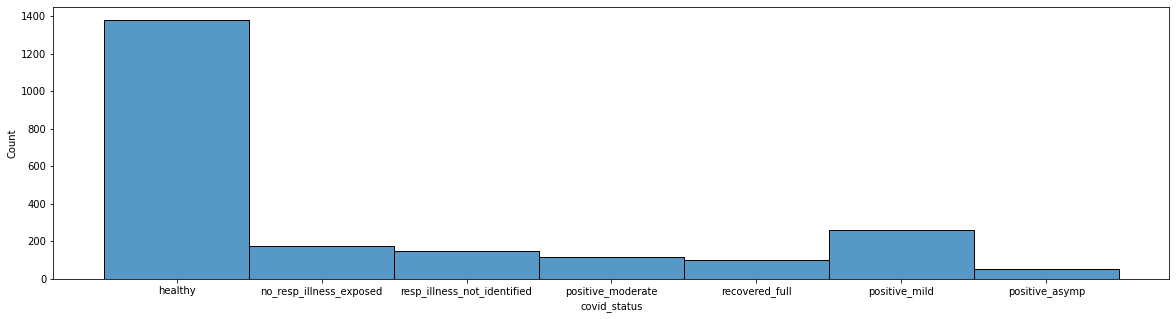

In [7]:
plt.figure(figsize=(20,5))
sns.histplot(cos_df['covid_status'])

In [8]:
# only covid positive & no respiratory problems samples

cos_covid = cos_df[( (cos_df.covid_status == 'positive_mild') 
                    | (cos_df.covid_status=='positive_asymp')
                    | (cos_df.covid_status =='positive_moderate') ) 
                  ]

#cos_covid.to_csv('cos_covid.csv')

print('SAMPLES: -->',len(cos_covid))
cos_covid.info()
cos_covid[:5]

SAMPLES: --> 430
<class 'pandas.core.frame.DataFrame'>
Int64Index: 430 entries, 28 to 2232
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            430 non-null    object
 1   covid_status  430 non-null    object
 2   test_status   335 non-null    object
 3   others_resp   10 non-null     object
 4   asthma        9 non-null      object
 5   pneumonia     12 non-null     object
 6   cld           4 non-null      object
dtypes: object(7)
memory usage: 26.9+ KB


id       covid_status test_status others_resp  \
28  9hXEs9OejdVxG6JJGCyKQpqVvy43  positive_moderate           p         NaN   
33  XbOUJCUl8GWEpQpIRMvujDE1sTE2  positive_moderate           p         NaN   
34  Qcliznd3z1VdWmJOZh9nvlstTYv1  positive_moderate           p         NaN   
36  AutXsDVtEcVH9ZQ58NqDunDcqZv1      positive_mild           p        True   
37  dFtGnzYqh1NVAwQUQ3wkysqAe3n1     positive_asymp           p         NaN   

   asthma pneumonia  cld  
28    NaN       NaN  NaN  
33    NaN       NaN  NaN  
34    NaN       NaN  NaN  
36    NaN       NaN  NaN  
37    NaN       NaN  NaN

In [9]:
# covid healthy & no respiratory problems samples (1359 + 170)

cos_healthy = cos_df[( (cos_df.covid_status == "healthy") 
                      | (cos_df.covid_status == "no_resp_illness_exposed") )
                    ]

#cos_healthy.to_csv('cos_healthy.csv')

print('SAMPLES: -->',len(cos_healthy))
cos_healthy.info()
cos_healthy[:5]

SAMPLES: --> 1553
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1553 entries, 0 to 2226
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1553 non-null   object
 1   covid_status  1553 non-null   object
 2   test_status   331 non-null    object
 3   others_resp   1 non-null      object
 4   asthma        22 non-null     object
 5   pneumonia     0 non-null      object
 6   cld           1 non-null      object
dtypes: object(7)
memory usage: 97.1+ KB


id covid_status test_status others_resp asthma  \
0  iV3Db6t1T8b7c5HQY2TwxIhjbzD3      healthy         NaN         NaN    NaN   
1  AxuYWBN0jFVLINCBqIW5aZmGCdu1      healthy         NaN         NaN    NaN   
2  C5eIsssb9GSkaAgIfsHMHeR6fSh1      healthy         NaN         NaN    NaN   
3  YjbEAECMBIaZKyfqOvWy5DDImUb2      healthy         NaN         NaN    NaN   
4  aGOvk4ji0cVqIzCs1jHnzlw2UEy2      healthy         NaN         NaN    NaN   

  pneumonia  cld  
0       NaN  NaN  
1       NaN  NaN  
2       NaN  NaN  
3       NaN  NaN  
4       NaN  NaN

In [10]:
# loads all file paths from location

cos_files = get_files(
  path = COS_data,
  extensions = '.wav',
  recurse = True
)

cos_files

(#20095) [Path('Extracted_data/20200419/vxQXoOBf9Oa0zTwHaKRyHqiUQTB2/breathing-deep.wav'),Path('Extracted_data/20200419/vxQXoOBf9Oa0zTwHaKRyHqiUQTB2/cough-shallow.wav'),Path('Extracted_data/20200419/vxQXoOBf9Oa0zTwHaKRyHqiUQTB2/vowel-o.wav'),Path('Extracted_data/20200419/vxQXoOBf9Oa0zTwHaKRyHqiUQTB2/vowel-a.wav'),Path('Extracted_data/20200419/vxQXoOBf9Oa0zTwHaKRyHqiUQTB2/cough-heavy.wav'),Path('Extracted_data/20200419/vxQXoOBf9Oa0zTwHaKRyHqiUQTB2/vowel-e.wav'),Path('Extracted_data/20200419/vxQXoOBf9Oa0zTwHaKRyHqiUQTB2/breathing-shallow.wav'),Path('Extracted_data/20200419/vxQXoOBf9Oa0zTwHaKRyHqiUQTB2/counting-fast.wav'),Path('Extracted_data/20200419/vxQXoOBf9Oa0zTwHaKRyHqiUQTB2/counting-normal.wav'),Path('Extracted_data/20200419/MEEGIoNSX4exg4oIL3Q9MdysPJq1/breathing-deep.wav')...]

In [11]:
# method to get file paths

def getit(id):
    for i in cos_files:
        folders = str(i).split("/")
        if folders[-1] == 'cough-heavy.wav':
            if folders[-2] == id:
                return str(i).split('Extracted_data/')[-1]
    

In [12]:
# save every audio files and the corresponding label in list

file_names = []
labels = []

for i in cos_covid.id.values:
    file_names.append(getit(i))
    labels.append('COVID POSITIVE')

for i in cos_healthy.id.values:
    file_names.append(getit(i))
    labels.append('COVID NEGATIVE')
    
print(file_names[:3])
print(labels[:3])

Counter(labels)

['20210816/9hXEs9OejdVxG6JJGCyKQpqVvy43/cough-heavy.wav', '20210816/XbOUJCUl8GWEpQpIRMvujDE1sTE2/cough-heavy.wav', '20210816/Qcliznd3z1VdWmJOZh9nvlstTYv1/cough-heavy.wav']
['COVID POSITIVE', 'COVID POSITIVE', 'COVID POSITIVE']


Counter({'COVID POSITIVE': 430, 'COVID NEGATIVE': 1553})

In [13]:
# dataframe for dataloader

df = pd.DataFrame({'filename' : file_names, 'category': labels})
three_df = df.copy()
three_df

filename        category
0     20210816/9hXEs9OejdVxG6JJGCyKQpqVvy43/cough-heavy.wav  COVID POSITIVE
1     20210816/XbOUJCUl8GWEpQpIRMvujDE1sTE2/cough-heavy.wav  COVID POSITIVE
2     20210816/Qcliznd3z1VdWmJOZh9nvlstTYv1/cough-heavy.wav  COVID POSITIVE
3     20210816/AutXsDVtEcVH9ZQ58NqDunDcqZv1/cough-heavy.wav  COVID POSITIVE
4     20210816/dFtGnzYqh1NVAwQUQ3wkysqAe3n1/cough-heavy.wav  COVID POSITIVE
...                                                     ...             ...
1978  20210714/tfZUfOLuABObiYEbvQPmySozHfg2/cough-heavy.wav  COVID NEGATIVE
1979  20210714/YXt9ERhtqqhCsrni0y61UNue3Yy2/cough-heavy.wav  COVID NEGATIVE
1980  20210714/gGgG540lBOZoSK1vyqNVlqBzQBl1/cough-heavy.wav  COVID NEGATIVE
1981  20210714/nx6RCgD0OjdzLa07UHBdHfz54ML2/cough-heavy.wav  COVID NEGATIVE
1982  20210714/J2KBR20S1lOfFS2iA7UyuOBOmgq1/cough-heavy.wav  COVID NEGATIVE

[1983 rows x 2 columns]

In [15]:
# # check audio files samplerate

# sr_list = []

# for i in three_df.filename.values:
#     sr_list.append(librosa.get_samplerate('./Extracted_data/'+i))
    
# sr_list = np.array(sr_list)

# values, counts = np.unique(sr_list, return_counts=True)
# print(values, counts)

# # check duration of each files

# dur_list = []
# failed_list = []
# for i in three_df.filename.values:
#     try:
#         y, sr = librosa.load('./Extracted_data/'+i)
#         dur_list.append(librosa.get_duration(y=y, sr=sr))
#     except:
#         failed_list.append(i)
#         pass
    
# dur_list = np.array(dur_list)

# print(np.mean(dur_list))
# print(np.average(dur_list))

# # files failed to load
# print(failed_list[:3])
# len(failed_list)

# # remove corrupted files
# for i in failed_list:
#     print(i)
#     three_df.drop(three_df[three_df.filename == i].index, inplace=True)
# three_df

COVID NEGATIVE    1553
COVID POSITIVE     430
Name: category, dtype: int64

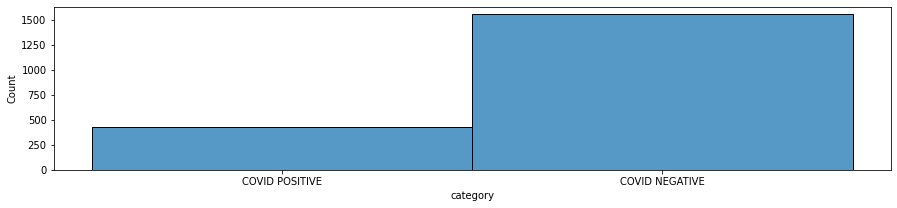

In [16]:
# check class distribution
plt.figure(figsize=(15,3))
sns.histplot(three_df['category'])

three_df['category'].value_counts()

In [17]:
# three_df.to_csv('coswara_df_2class.csv', index=False) 

# Mel-Spectrogram and Augmentation

In [18]:
# resize audio to a uniform length and create mel-spectrogram from audio

cfg = AudioConfig.BasicMelSpectrogram(sample_rate=22050, n_fft=1024, hop_length=512, f_min=0.0, f_max=4000,
                                      n_mels=64, normalized=False, norm=None, mel=True, to_db=True)

crop6s = ResizeSignal(duration=6000)
a2s = AudioToSpec.from_cfg(cfg)
SGR = SGRoll(max_shift_pct=0.5, direction=0)
MT = MaskTime(size=5)
MF =  MaskFreq(size=5)

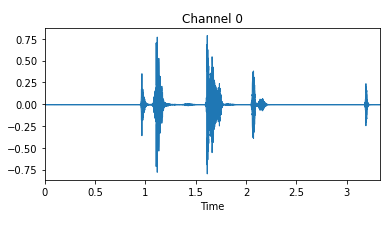

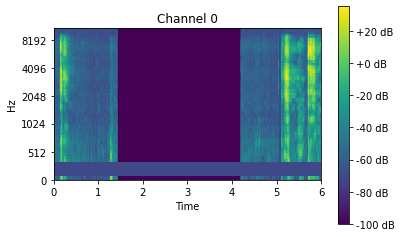

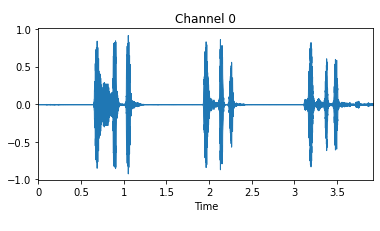

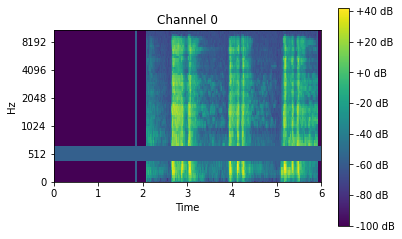

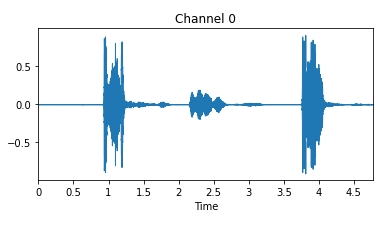

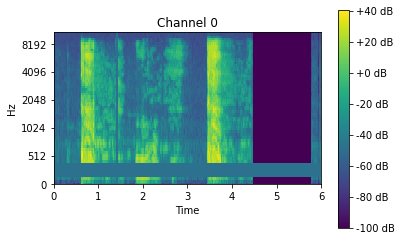

In [19]:
# check transformations
pipe = Pipeline([AudioTensor.create, crop6s, a2s, SGR, MT, MF])

for fn in three_df.filename.values[42:45]:
      audio = AudioTensor.create('./Extracted_data/'+fn)
      audio.show()
      pipe('./Extracted_data/'+fn).show()

## Dataloader

In [20]:
three_df, three_df_test = train_test_split(three_df, test_size=0.15, random_state=69, stratify=three_df.category.values)

In [21]:
print(three_df.category.value_counts())
print(three_df_test.category.value_counts())

COVID NEGATIVE    1320
COVID POSITIVE     365
Name: category, dtype: int64
COVID NEGATIVE    233
COVID POSITIVE     65
Name: category, dtype: int64


Setting-up type transforms pipelines
933   20200502/DZmX1dGK8KdmY3WYQFuCXrVWuhk2/cough-heavy.wav  COVID NEGATIVE
1736  20210406/9jmKb1whQ0VGTqOaHvdOOr1oo6T2/cough-heavy.wav  COVID NEGATIVE
996   20200502/3xebjLX0tvTb7LwpMw7QiNixBln2/cough-heavy.wav  COVID NEGATIVE
382   20210603/E3nlERKGBPcSO2PjEDJ6GrRKiy73/cough-heavy.wav  COVID POSITIVE
244   20210406/pWFMPFBys1bBerYz5Si4Gb8brGn1/cough-heavy.wav  COVID POSITIVE
...                                                     ...             ...
1515  20200416/OatFCKWJSXcyyGHHGozArF6mCVU2/cough-heavy.wav  COVID NEGATIVE
105   20210507/yHDFkOJHVZTgJAab31hQ0cq9rUb2/cough-heavy.wav  COVID POSITIVE
844   20200417/x9L8LSXL39VqXt0Y00ekk3G9Gqn1/cough-heavy.wav  COVID NEGATIVE
1096  20200604/8e6tYVdZj2btq3rYpi9zsy5VujF3/cough-heavy.wav  COVID NEGATIVE
599   20200415/E3X8YtvZzYZiXwBevZEAByJc2v63/cough-heavy.wav  COVID NEGATIVE

[1685 rows x 2 columns]
Found 1685 items
2 datasets of sizes 1432,253
Setting up Pipeline: ColReader -- {'cols': 'filename', '

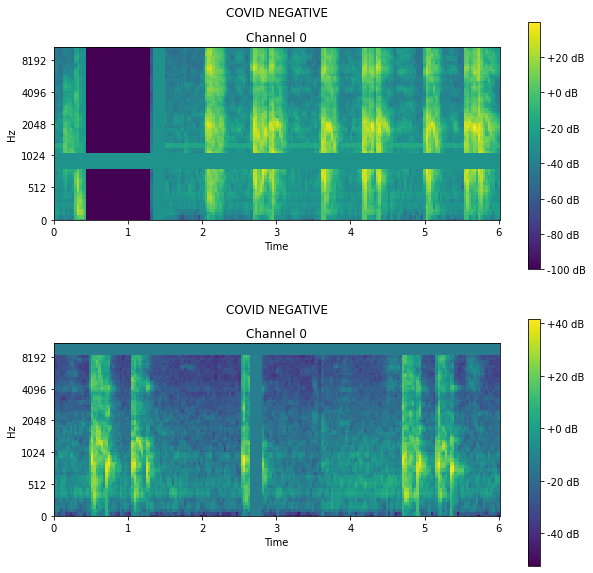

In [22]:
item_tfms = [crop6s, a2s, SGR, MT, MF]

auds = DataBlock(blocks = (AudioBlock, CategoryBlock),  
                 get_x = ColReader("filename", pref= './Extracted_data/'),
                 splitter = TrainTestSplitter(test_size=0.15, random_state=69, 
                                              stratify=three_df.category.values),
                 item_tfms = item_tfms,
                 get_y = ColReader("category"))


auds.summary(three_df, show_batch=True, figsize=(10, 10))

## Check data distribution

In [23]:
dls_noweight = auds.dataloaders(three_df, bs=32)

for i in range(10):
    x,y = dls_noweight.one_batch()
    print(np.unique(y.cpu(), return_counts=True))

print(dls_noweight.train.items.category.value_counts())
print(dls_noweight.valid.items.category.value_counts())

(array([0, 1]), array([28,  4]))
(array([0, 1]), array([26,  6]))
(array([0, 1]), array([30,  2]))
(array([0, 1]), array([24,  8]))
(array([0, 1]), array([26,  6]))
(array([0, 1]), array([27,  5]))
(array([0, 1]), array([28,  4]))
(array([0, 1]), array([28,  4]))
(array([0, 1]), array([23,  9]))
(array([0, 1]), array([27,  5]))
COVID NEGATIVE    1122
COVID POSITIVE     310
Name: category, dtype: int64
COVID NEGATIVE    198
COVID POSITIVE     55
Name: category, dtype: int64


## Weighted dataloaders

In [24]:
dsets = auds.datasets(three_df)

count = Counter(three_df.category.values)
wgts = [1/count[dsets.vocab[label]] for cat, label in dsets.train]
wgts[:10]
np.unique(np.array(wgts), return_counts=True)

(array([0.00075758, 0.00273973]), array([1122,  310]))

(array([0, 1]), array([14, 18]))
(array([0, 1]), array([16, 16]))
(array([0, 1]), array([15, 17]))
(array([0, 1]), array([18, 14]))
(array([0, 1]), array([15, 17]))
(array([0, 1]), array([18, 14]))
(array([0, 1]), array([17, 15]))
(array([0, 1]), array([16, 16]))
(array([0, 1]), array([14, 18]))
(array([0, 1]), array([13, 19]))


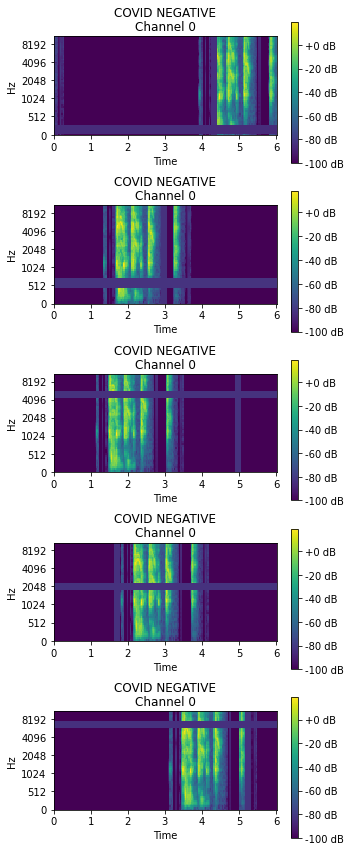

In [25]:
dls = auds.dataloaders(three_df, bs=32, dl_type=WeightedDL, wgts=wgts)

for i in range(10):
    x,y = dls.one_batch()
    print(np.unique(y.cpu(), return_counts=True))

dls.train.show_batch(max_n=5, nrows=5, unique=True, figsize=(5, 15))

In [26]:
test_dl = dls.test_dl(three_df_test, with_labels=True)

In [27]:
print(dls.train.items.category.value_counts())
print(dls.valid.items.category.value_counts())
print(test_dl.items.category.value_counts())

COVID NEGATIVE    1122
COVID POSITIVE     310
Name: category, dtype: int64
COVID NEGATIVE    198
COVID POSITIVE     55
Name: category, dtype: int64
COVID NEGATIVE    233
COVID POSITIVE     65
Name: category, dtype: int64


# Models: 1cycle policy

### ResNet-18

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

Better model found at epoch 0 with accuracy value: 0.5335968136787415.
Better model found at epoch 2 with accuracy value: 0.5533596873283386.
Better model found at epoch 4 with accuracy value: 0.5612648129463196.
Better model found at epoch 6 with accuracy value: 0.5652173757553101.
Better model found at epoch 7 with accuracy value: 0.6205533742904663.
Better model found at epoch 8 with accuracy value: 0.6561264991760254.
Better model found at epoch 15 with accuracy value: 0.6640316247940063.
Better model found at epoch 17 with accuracy value: 0.695652186870575.


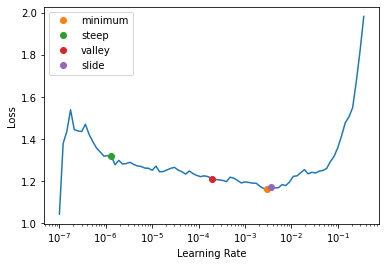

In [28]:
learn = cnn_learner(dls, resnet18, # <- model
                    n_in=1,  # <- This is the only audio specific modification here
                    metrics=[accuracy, RocAucBinary(average='macro')],
                    cbs=(SaveModelCallback(monitor='accuracy', with_opt=True))
                   )

# Find Learning Rate
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

# Run 
learn.fit_one_cycle(50, lrs.valley)

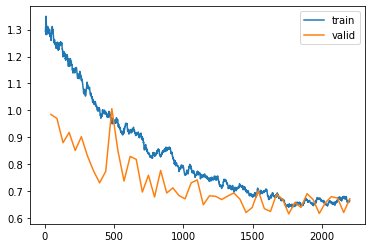

In [29]:
learn.recorder.plot_loss()

0.6644295302013423 0.6160779135028063 0.5793812104787714 0.6023770221195114 0.6023770221195114 0.57870158875184
^^    accuracy, rocauc, f1, recall, specificity, precision    ^^
              precision    recall  f1-score   support

           0       0.83      0.71      0.77       233
           1       0.32      0.49      0.39        65

    accuracy                           0.66       298
   macro avg       0.58      0.60      0.58       298
weighted avg       0.72      0.66      0.69       298



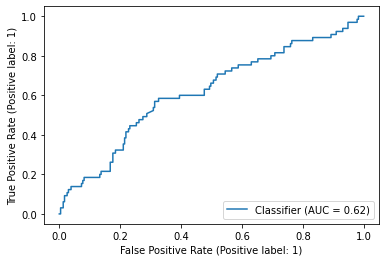

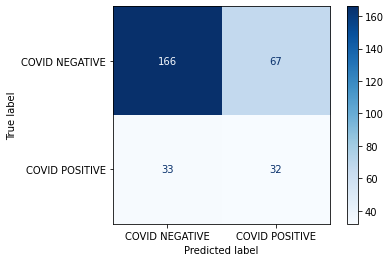

In [30]:
xx = learn.load('./model')

pred_probas, actual_classes, pred_classes = xx.get_preds(dl=test_dl, with_decoded=True)

acc = accuracy_score(actual_classes, pred_classes)
rocauc = roc_auc_score(actual_classes, pred_probas[:, 1], average='macro')
fone= f1_score(actual_classes, pred_classes, average='macro')
rec = recall_score(actual_classes, pred_classes, average='macro')
prec = precision_score(actual_classes, pred_classes, average='macro')
spc = specificity_score(actual_classes, pred_classes, average='macro')


print(acc, rocauc, fone, rec, spc, prec)
print('^^    accuracy, rocauc, f1, recall, specificity, precision    ^^')

print(classification_report(actual_classes, pred_classes))       
RocCurveDisplay.from_predictions(actual_classes, pred_probas[:, 1])
plt.show()

ConfusionMatrixDisplay.from_predictions(actual_classes, pred_classes, 
                                        display_labels=test_dl.vocab,cmap=plt.cm.Blues)
plt.show()

### ResNet-34

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

Better model found at epoch 0 with accuracy value: 0.5533596873283386.
Better model found at epoch 1 with accuracy value: 0.6245059370994568.
Better model found at epoch 4 with accuracy value: 0.6403161883354187.
Better model found at epoch 5 with accuracy value: 0.6600790619850159.
Better model found at epoch 10 with accuracy value: 0.6679841876029968.
Better model found at epoch 11 with accuracy value: 0.6758893132209778.
Better model found at epoch 13 with accuracy value: 0.695652186870575.
Better model found at epoch 17 with accuracy value: 0.7193675637245178.
Better model found at epoch 23 with accuracy value: 0.7272727489471436.
Better model found at epoch 26 with accuracy value: 0.739130437374115.
Better model found at epoch 28 with accuracy value: 0.7588932514190674.
Better model found at epoch 34 with accuracy value: 0.7786561250686646.
Better model found at epoch 39 with accuracy value: 0.790513813495636.
Better model found at epoch 41 with accuracy value: 0.8102766871452332.

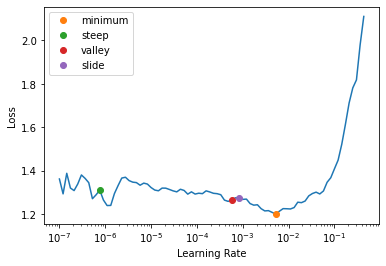

In [31]:
learn = cnn_learner(dls, resnet34, # <- model
                    n_in=1,  # <- This is the only audio specific modification here
                    metrics=[accuracy, RocAucBinary(average='macro')],
                    cbs=(SaveModelCallback(monitor='accuracy', with_opt=True))
                   )

# Find Learning Rate
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

# Run 
learn.fit_one_cycle(50, lrs.valley)

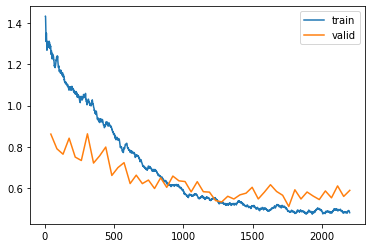

In [32]:
learn.recorder.plot_loss()

0.7281879194630873 0.7497193793331133 0.6526056733301671 0.6819742489270386 0.6819742489270386 0.6437213183145598
^^    accuracy, rocauc, f1, recall, specificity, precision    ^^
              precision    recall  f1-score   support

           0       0.87      0.76      0.81       233
           1       0.41      0.60      0.49        65

    accuracy                           0.73       298
   macro avg       0.64      0.68      0.65       298
weighted avg       0.77      0.73      0.74       298



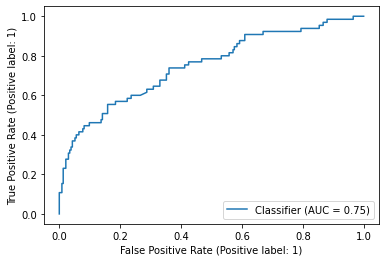

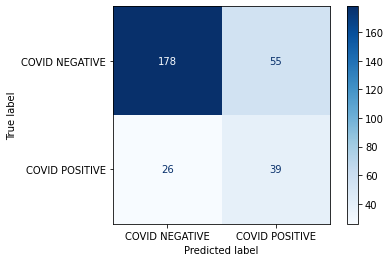

In [33]:
xx = learn.load('./model')

pred_probas, actual_classes, pred_classes = xx.get_preds(dl=test_dl, with_decoded=True)

acc = accuracy_score(actual_classes, pred_classes)
rocauc = roc_auc_score(actual_classes, pred_probas[:, 1], average='macro')
fone= f1_score(actual_classes, pred_classes, average='macro')
rec = recall_score(actual_classes, pred_classes, average='macro')
prec = precision_score(actual_classes, pred_classes, average='macro')
spc = specificity_score(actual_classes, pred_classes, average='macro')


print(acc, rocauc, fone, rec, spc, prec)
print('^^    accuracy, rocauc, f1, recall, specificity, precision    ^^')

print(classification_report(actual_classes, pred_classes))       
RocCurveDisplay.from_predictions(actual_classes, pred_probas[:, 1])
plt.show()

ConfusionMatrixDisplay.from_predictions(actual_classes, pred_classes, 
                                        display_labels=test_dl.vocab,cmap=plt.cm.Blues)
plt.show()

### ResNet-50

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

Better model found at epoch 0 with accuracy value: 0.5059288740158081.
Better model found at epoch 1 with accuracy value: 0.6126482486724854.
Better model found at epoch 4 with accuracy value: 0.6284584999084473.
Better model found at epoch 5 with accuracy value: 0.6482213735580444.
Better model found at epoch 6 with accuracy value: 0.6679841876029968.
Better model found at epoch 7 with accuracy value: 0.6837944388389587.
Better model found at epoch 9 with accuracy value: 0.6916996240615845.
Better model found at epoch 23 with accuracy value: 0.7035573124885559.
Better model found at epoch 24 with accuracy value: 0.7114624381065369.
Better model found at epoch 38 with accuracy value: 0.731225311756134.
Better model found at epoch 42 with accuracy value: 0.739130437374115.


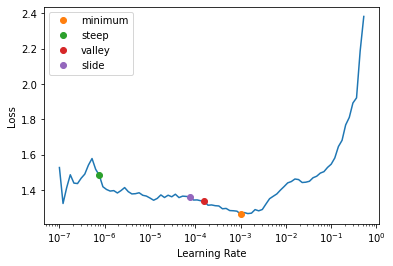

In [34]:
learn = cnn_learner(dls, resnet50, # <- model
                    n_in=1,  # <- This is the only audio specific modification here
                    metrics=[accuracy, RocAucBinary(average='macro')],
                    cbs=(SaveModelCallback(monitor='accuracy', with_opt=True))
                   )

# Find Learning Rate
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

# Run 
learn.fit_one_cycle(50, lrs.valley)

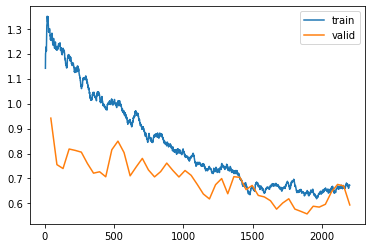

In [35]:
learn.recorder.plot_loss()

0.7080536912751678 0.7168372400132057 0.6407300139960921 0.6801914823374051 0.6801914823374051 0.6352597145122918
^^    accuracy, rocauc, f1, recall, specificity, precision    ^^
              precision    recall  f1-score   support

           0       0.88      0.73      0.80       233
           1       0.39      0.63      0.49        65

    accuracy                           0.71       298
   macro avg       0.64      0.68      0.64       298
weighted avg       0.77      0.71      0.73       298



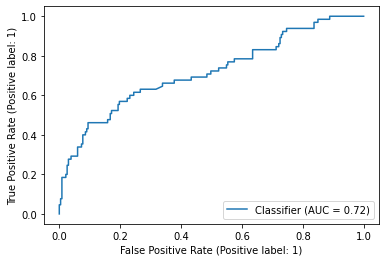

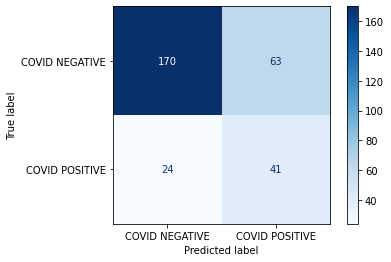

In [36]:
xx = learn.load('./model')

pred_probas, actual_classes, pred_classes = xx.get_preds(dl=test_dl, with_decoded=True)

acc = accuracy_score(actual_classes, pred_classes)
rocauc = roc_auc_score(actual_classes, pred_probas[:, 1], average='macro')
fone= f1_score(actual_classes, pred_classes, average='macro')
rec = recall_score(actual_classes, pred_classes, average='macro')
prec = precision_score(actual_classes, pred_classes, average='macro')
spc = specificity_score(actual_classes, pred_classes, average='macro')


print(acc, rocauc, fone, rec, spc, prec)
print('^^    accuracy, rocauc, f1, recall, specificity, precision    ^^')

print(classification_report(actual_classes, pred_classes))       
RocCurveDisplay.from_predictions(actual_classes, pred_probas[:, 1])
plt.show()

ConfusionMatrixDisplay.from_predictions(actual_classes, pred_classes, 
                                        display_labels=test_dl.vocab,cmap=plt.cm.Blues)
plt.show()

### ResNet-101

Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth


  0%|          | 0.00/171M [00:00<?, ?B/s]

Better model found at epoch 0 with accuracy value: 0.5019763112068176.
Better model found at epoch 1 with accuracy value: 0.5928853750228882.
Better model found at epoch 2 with accuracy value: 0.6324110627174377.
Better model found at epoch 5 with accuracy value: 0.6403161883354187.
Better model found at epoch 10 with accuracy value: 0.6798418760299683.
Better model found at epoch 12 with accuracy value: 0.7114624381065369.
Better model found at epoch 18 with accuracy value: 0.7272727489471436.
Better model found at epoch 19 with accuracy value: 0.7430830001831055.
Better model found at epoch 25 with accuracy value: 0.7667984366416931.
Better model found at epoch 30 with accuracy value: 0.790513813495636.
Better model found at epoch 39 with accuracy value: 0.7944663763046265.


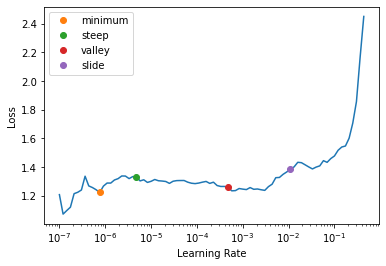

In [37]:
learn = cnn_learner(dls, resnet101, # <- model
                    n_in=1,  # <- This is the only audio specific modification here
                    metrics=[accuracy, RocAucBinary(average='macro')],
                    cbs=(SaveModelCallback(monitor='accuracy', with_opt=True))
                   )

# Find Learning Rate
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

# Run 
learn.fit_one_cycle(50, lrs.valley)

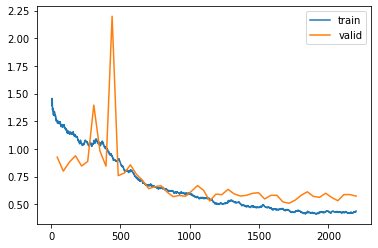

In [38]:
learn.recorder.plot_loss()

0.7550335570469798 0.7359194453615054 0.6609149715532694 0.6714097061736547 0.6714097061736547 0.6538643907064959
^^    accuracy, rocauc, f1, recall, specificity, precision    ^^
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       233
           1       0.45      0.52      0.48        65

    accuracy                           0.76       298
   macro avg       0.65      0.67      0.66       298
weighted avg       0.77      0.76      0.76       298



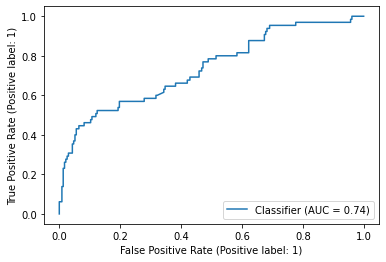

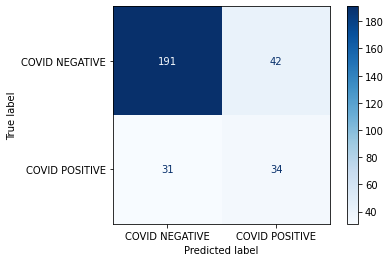

In [39]:
xx = learn.load('./model')

pred_probas, actual_classes, pred_classes = xx.get_preds(dl=test_dl, with_decoded=True)

acc = accuracy_score(actual_classes, pred_classes)
rocauc = roc_auc_score(actual_classes, pred_probas[:, 1], average='macro')
fone= f1_score(actual_classes, pred_classes, average='macro')
rec = recall_score(actual_classes, pred_classes, average='macro')
prec = precision_score(actual_classes, pred_classes, average='macro')
spc = specificity_score(actual_classes, pred_classes, average='macro')


print(acc, rocauc, fone, rec, spc, prec)
print('^^    accuracy, rocauc, f1, recall, specificity, precision    ^^')

print(classification_report(actual_classes, pred_classes))       
RocCurveDisplay.from_predictions(actual_classes, pred_probas[:, 1])
plt.show()

ConfusionMatrixDisplay.from_predictions(actual_classes, pred_classes, 
                                        display_labels=test_dl.vocab,cmap=plt.cm.Blues)
plt.show()

### vgg16_bn

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/hub/checkpoints/vgg16_bn-6c64b313.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

Better model found at epoch 0 with accuracy value: 0.5138339996337891.
Better model found at epoch 1 with accuracy value: 0.52173912525177.
Better model found at epoch 2 with accuracy value: 0.6245059370994568.
Better model found at epoch 3 with accuracy value: 0.6482213735580444.
Better model found at epoch 7 with accuracy value: 0.6798418760299683.
Better model found at epoch 9 with accuracy value: 0.7075098752975464.
Better model found at epoch 16 with accuracy value: 0.7114624381065369.
Better model found at epoch 25 with accuracy value: 0.7430830001831055.
Better model found at epoch 32 with accuracy value: 0.7588932514190674.


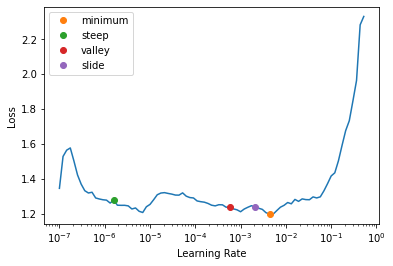

In [40]:
learn = cnn_learner(dls, vgg16_bn, # <- model
                    n_in=1,  # <- This is the only audio specific modification here
                    metrics=[accuracy, RocAucBinary(average='macro')],
                    cbs=(SaveModelCallback(monitor='accuracy', with_opt=True))
                   )

# Find Learning Rate
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

# Run 
learn.fit_one_cycle(50, lrs.valley)

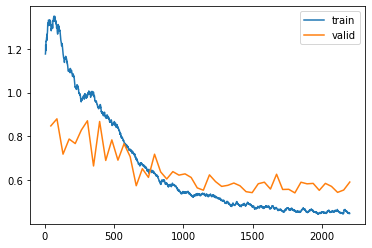

In [41]:
learn.recorder.plot_loss()

0.7449664429530202 0.7670188180917794 0.6552815829528158 0.6705183228788378 0.6705183228788378 0.6469249587529158
^^    accuracy, rocauc, f1, recall, specificity, precision    ^^
              precision    recall  f1-score   support

           0       0.86      0.80      0.83       233
           1       0.43      0.54      0.48        65

    accuracy                           0.74       298
   macro avg       0.65      0.67      0.66       298
weighted avg       0.77      0.74      0.75       298



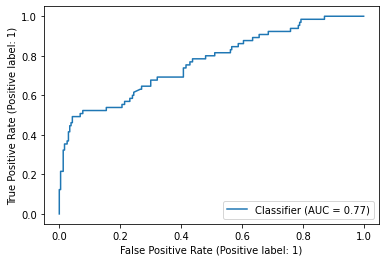

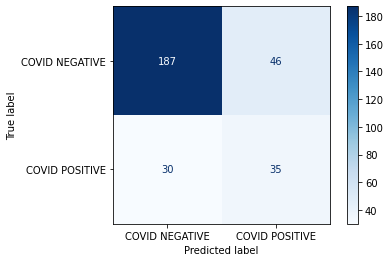

In [42]:
xx = learn.load('./model')

pred_probas, actual_classes, pred_classes = xx.get_preds(dl=test_dl, with_decoded=True)

acc = accuracy_score(actual_classes, pred_classes)
rocauc = roc_auc_score(actual_classes, pred_probas[:, 1], average='macro')
fone= f1_score(actual_classes, pred_classes, average='macro')
rec = recall_score(actual_classes, pred_classes, average='macro')
prec = precision_score(actual_classes, pred_classes, average='macro')
spc = specificity_score(actual_classes, pred_classes, average='macro')


print(acc, rocauc, fone, rec, spc, prec)
print('^^    accuracy, rocauc, f1, recall, specificity, precision    ^^')

print(classification_report(actual_classes, pred_classes))       
RocCurveDisplay.from_predictions(actual_classes, pred_probas[:, 1])
plt.show()

ConfusionMatrixDisplay.from_predictions(actual_classes, pred_classes, 
                                        display_labels=test_dl.vocab,cmap=plt.cm.Blues)
plt.show()

### vgg19_bn

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

Better model found at epoch 0 with accuracy value: 0.5770751237869263.
Better model found at epoch 1 with accuracy value: 0.6324110627174377.
Better model found at epoch 2 with accuracy value: 0.6403161883354187.
Better model found at epoch 7 with accuracy value: 0.6442687511444092.
Better model found at epoch 9 with accuracy value: 0.7193675637245178.
Better model found at epoch 17 with accuracy value: 0.7233201861381531.
Better model found at epoch 19 with accuracy value: 0.7707509994506836.
Better model found at epoch 32 with accuracy value: 0.7984189987182617.
Better model found at epoch 42 with accuracy value: 0.8142292499542236.


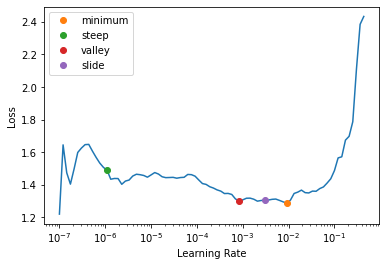

In [43]:
learn = cnn_learner(dls, vgg19_bn, # <- model
                    n_in=1,  # <- This is the only audio specific modification here
                    metrics=[accuracy, RocAucBinary(average='macro')],
                    cbs=(SaveModelCallback(monitor='accuracy', with_opt=True))
                   )

# Find Learning Rate
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

# Run 
learn.fit_one_cycle(50, lrs.valley)

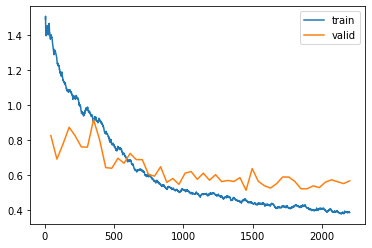

In [44]:
learn.recorder.plot_loss()

0.8187919463087249 0.7721030042918455 0.7282674772036474 0.7232750082535491 0.7232750082535491 0.7339005326139587
^^    accuracy, rocauc, f1, recall, specificity, precision    ^^
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       233
           1       0.59      0.55      0.57        65

    accuracy                           0.82       298
   macro avg       0.73      0.72      0.73       298
weighted avg       0.81      0.82      0.82       298



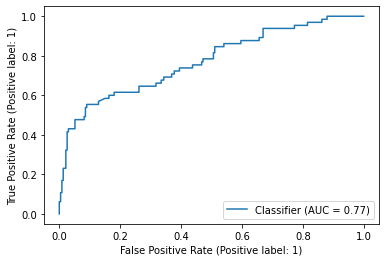

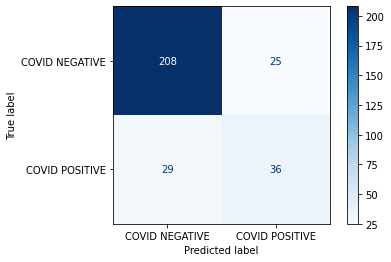

In [45]:
xx = learn.load('./model')

pred_probas, actual_classes, pred_classes = xx.get_preds(dl=test_dl, with_decoded=True)

acc = accuracy_score(actual_classes, pred_classes)
rocauc = roc_auc_score(actual_classes, pred_probas[:, 1], average='macro')
fone= f1_score(actual_classes, pred_classes, average='macro')
rec = recall_score(actual_classes, pred_classes, average='macro')
prec = precision_score(actual_classes, pred_classes, average='macro')
spc = specificity_score(actual_classes, pred_classes, average='macro')


print(acc, rocauc, fone, rec, spc, prec)
print('^^    accuracy, rocauc, f1, recall, specificity, precision    ^^')

print(classification_report(actual_classes, pred_classes))       
RocCurveDisplay.from_predictions(actual_classes, pred_probas[:, 1])
plt.show()

ConfusionMatrixDisplay.from_predictions(actual_classes, pred_classes, 
                                        display_labels=test_dl.vocab,cmap=plt.cm.Blues)
plt.show()

### alexnet

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

Better model found at epoch 0 with accuracy value: 0.5138339996337891.
Better model found at epoch 1 with accuracy value: 0.5494071245193481.
Better model found at epoch 2 with accuracy value: 0.5612648129463196.
Better model found at epoch 3 with accuracy value: 0.6205533742904663.
Better model found at epoch 10 with accuracy value: 0.6403161883354187.
Better model found at epoch 11 with accuracy value: 0.6600790619850159.
Better model found at epoch 37 with accuracy value: 0.6719367504119873.


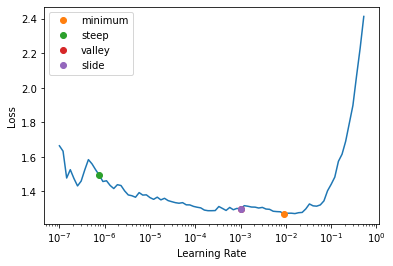

In [46]:
learn = cnn_learner(dls, alexnet, # <- model
                    n_in=1,  # <- This is the only audio specific modification here
                    metrics=[accuracy, RocAucBinary(average='macro')],
                    cbs=(SaveModelCallback(monitor='accuracy', with_opt=True))
                   )

# Find Learning Rate
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

# Run 
learn.fit_one_cycle(50, lrs.valley)

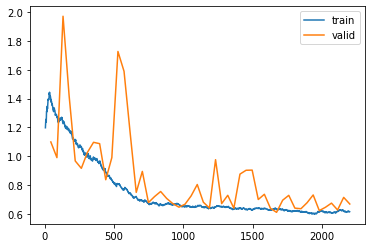

In [47]:
learn.recorder.plot_loss()

0.6610738255033557 0.6690656982502476 0.5858548331613347 0.61687025420931 0.61687025420931 0.5869693396226415
^^    accuracy, rocauc, f1, recall, specificity, precision    ^^
              precision    recall  f1-score   support

           0       0.84      0.70      0.76       233
           1       0.33      0.54      0.41        65

    accuracy                           0.66       298
   macro avg       0.59      0.62      0.59       298
weighted avg       0.73      0.66      0.69       298



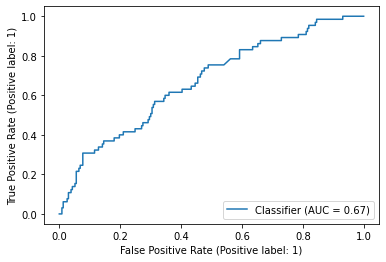

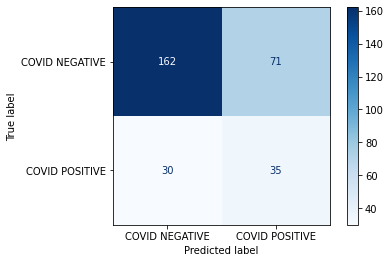

In [48]:
xx = learn.load('./model')

pred_probas, actual_classes, pred_classes = xx.get_preds(dl=test_dl, with_decoded=True)

acc = accuracy_score(actual_classes, pred_classes)
rocauc = roc_auc_score(actual_classes, pred_probas[:, 1], average='macro')
fone= f1_score(actual_classes, pred_classes, average='macro')
rec = recall_score(actual_classes, pred_classes, average='macro')
prec = precision_score(actual_classes, pred_classes, average='macro')
spc = specificity_score(actual_classes, pred_classes, average='macro')


print(acc, rocauc, fone, rec, spc, prec)
print('^^    accuracy, rocauc, f1, recall, specificity, precision    ^^')

print(classification_report(actual_classes, pred_classes))       
RocCurveDisplay.from_predictions(actual_classes, pred_probas[:, 1])
plt.show()

ConfusionMatrixDisplay.from_predictions(actual_classes, pred_classes, 
                                        display_labels=test_dl.vocab,cmap=plt.cm.Blues)
plt.show()

### squeezenet1_0

Downloading: "https://download.pytorch.org/models/squeezenet1_0-b66bff10.pth" to /root/.cache/torch/hub/checkpoints/squeezenet1_0-b66bff10.pth


  0%|          | 0.00/4.78M [00:00<?, ?B/s]

Better model found at epoch 0 with accuracy value: 0.5533596873283386.
Better model found at epoch 2 with accuracy value: 0.5849802494049072.
Better model found at epoch 3 with accuracy value: 0.5928853750228882.
Better model found at epoch 5 with accuracy value: 0.6047430634498596.
Better model found at epoch 10 with accuracy value: 0.6324110627174377.
Better model found at epoch 12 with accuracy value: 0.6442687511444092.
Better model found at epoch 13 with accuracy value: 0.6640316247940063.
Better model found at epoch 38 with accuracy value: 0.687747061252594.
Better model found at epoch 47 with accuracy value: 0.7154150009155273.


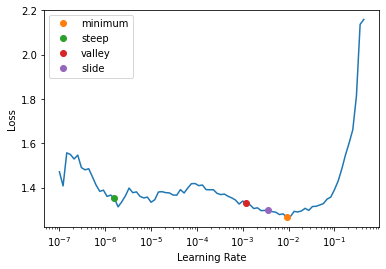

In [49]:
learn = cnn_learner(dls, squeezenet1_0, # <- model
                    n_in=1,  # <- This is the only audio specific modification here
                    metrics=[accuracy, RocAucBinary(average='macro')],
                    cbs=(SaveModelCallback(monitor='accuracy', with_opt=True))
                   )

# Find Learning Rate
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

# Run 
learn.fit_one_cycle(50, lrs.valley)

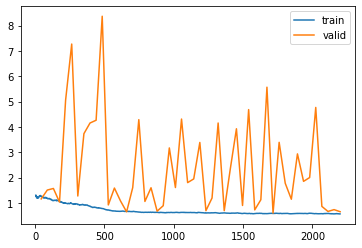

In [50]:
learn.recorder.plot_loss()

0.7348993288590604 0.7145922746781116 0.6611833110257186 0.6918124793661274 0.6918124793661274 0.6514914476428869
^^    accuracy, rocauc, f1, recall, specificity, precision    ^^
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       233
           1       0.43      0.62      0.50        65

    accuracy                           0.73       298
   macro avg       0.65      0.69      0.66       298
weighted avg       0.78      0.73      0.75       298



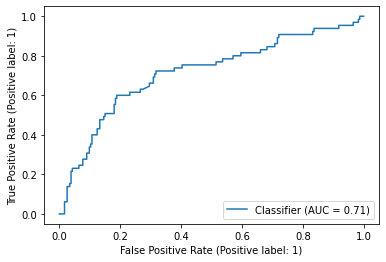

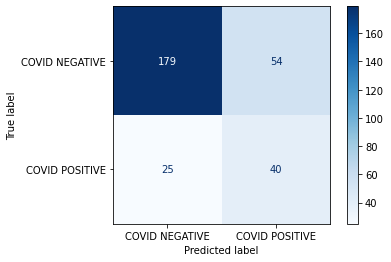

In [51]:
xx = learn.load('./model')

pred_probas, actual_classes, pred_classes = xx.get_preds(dl=test_dl, with_decoded=True)

acc = accuracy_score(actual_classes, pred_classes)
rocauc = roc_auc_score(actual_classes, pred_probas[:, 1], average='macro')
fone= f1_score(actual_classes, pred_classes, average='macro')
rec = recall_score(actual_classes, pred_classes, average='macro')
prec = precision_score(actual_classes, pred_classes, average='macro')
spc = specificity_score(actual_classes, pred_classes, average='macro')


print(acc, rocauc, fone, rec, spc, prec)
print('^^    accuracy, rocauc, f1, recall, specificity, precision    ^^')

print(classification_report(actual_classes, pred_classes))       
RocCurveDisplay.from_predictions(actual_classes, pred_probas[:, 1])
plt.show()

ConfusionMatrixDisplay.from_predictions(actual_classes, pred_classes, 
                                        display_labels=test_dl.vocab,cmap=plt.cm.Blues)
plt.show()

### densenet121

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth


  0%|          | 0.00/30.8M [00:00<?, ?B/s]

Better model found at epoch 0 with accuracy value: 0.4308300316333771.
Better model found at epoch 1 with accuracy value: 0.5612648129463196.
Better model found at epoch 2 with accuracy value: 0.5691699385643005.
Better model found at epoch 3 with accuracy value: 0.5889328122138977.
Better model found at epoch 4 with accuracy value: 0.6086956262588501.
Better model found at epoch 6 with accuracy value: 0.695652186870575.
Better model found at epoch 14 with accuracy value: 0.7193675637245178.
Better model found at epoch 17 with accuracy value: 0.7667984366416931.
Better model found at epoch 18 with accuracy value: 0.7707509994506836.
Better model found at epoch 29 with accuracy value: 0.7944663763046265.
Better model found at epoch 31 with accuracy value: 0.7984189987182617.
Better model found at epoch 40 with accuracy value: 0.8063241243362427.


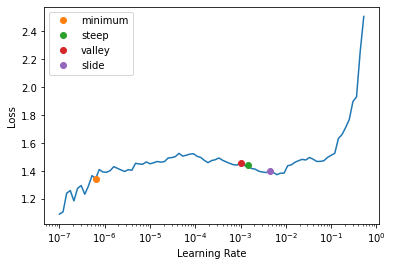

In [52]:
learn = cnn_learner(dls, densenet121, # <- model
                    n_in=1,  # <- This is the only audio specific modification here
                    metrics=[accuracy, RocAucBinary(average='macro')],
                    cbs=(SaveModelCallback(monitor='accuracy', with_opt=True))
                   )

# Find Learning Rate
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

# Run 
learn.fit_one_cycle(50, lrs.valley)

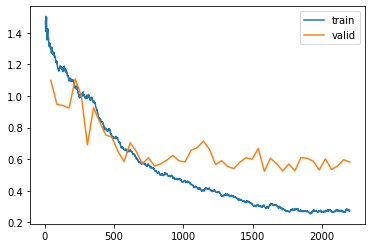

In [53]:
learn.recorder.plot_loss()

0.761744966442953 0.8073951799273688 0.6930197466738244 0.725619016176956 0.725619016176956 0.6802975939214859
^^    accuracy, rocauc, f1, recall, specificity, precision    ^^
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       233
           1       0.47      0.66      0.55        65

    accuracy                           0.76       298
   macro avg       0.68      0.73      0.69       298
weighted avg       0.80      0.76      0.77       298



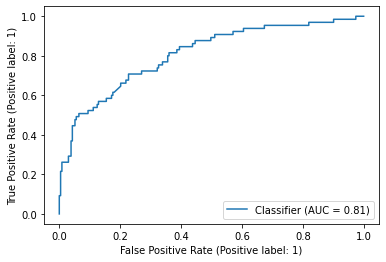

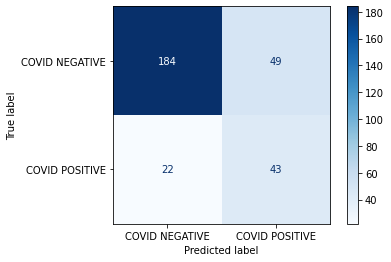

In [54]:
xx = learn.load('./model')

pred_probas, actual_classes, pred_classes = xx.get_preds(dl=test_dl, with_decoded=True)

acc = accuracy_score(actual_classes, pred_classes)
rocauc = roc_auc_score(actual_classes, pred_probas[:, 1], average='macro')
fone= f1_score(actual_classes, pred_classes, average='macro')
rec = recall_score(actual_classes, pred_classes, average='macro')
prec = precision_score(actual_classes, pred_classes, average='macro')
spc = specificity_score(actual_classes, pred_classes, average='macro')


print(acc, rocauc, fone, rec, spc, prec)
print('^^    accuracy, rocauc, f1, recall, specificity, precision    ^^')

print(classification_report(actual_classes, pred_classes))       
RocCurveDisplay.from_predictions(actual_classes, pred_probas[:, 1])
plt.show()

ConfusionMatrixDisplay.from_predictions(actual_classes, pred_classes, 
                                        display_labels=test_dl.vocab,cmap=plt.cm.Blues)
plt.show()